In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
file = 'catData.csv'
df = pd.read_csv(file)
df.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
print(f"Number of rows = {df.shape[0]}")
print(f"Number of columns = {df.shape[1]}")

Number of rows = 1059
Number of columns = 8


In [ ]:
print("List of columns: \n", list(df.columns))

List of columns: 
 ['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour', 'Grade']


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print(f"Categorical columns = {cat_cols}")
print(f"Numeric columns = {num_cols}")

Categorical columns = ['Grade']
Numeric columns = ['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour']


In [ ]:
print("Data types of columns: \n", df.dtypes)

Data types of columns: 
 pH             float64
Temperature      int64
Taste            int64
Odour            int64
Fat              int64
Turbidity        int64
Colour           int64
Grade           object
dtype: object


In [ ]:
print("Data information: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odour        1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
Data information: 
 None


In [ ]:
print('Checking for duplicate records: \n')
if df.duplicated().any():
    print("Duplicate rows are present in dataset")
else:
    print("No duplicates in dataset")

Checking for duplicate records: 

Duplicate rows are present in dataset


In [ ]:
print("Display duplicate records: \n")
df[df.duplicated()]

Display duplicate records: 



,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [ ]:
print("Drop duplicates")
df1 = df.drop_duplicates()
print("Dataset after removing duplicates")
df1.shape

Drop duplicates
Dataset after removing duplicates


(83, 8)

In [ ]:
print("Checking for missing values in dataset")
df1.isnull().sum()

Checking for missing values in dataset


pH             0
Temperature    0
Taste          0
Odour          0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

In [ ]:
print("Statistical measures of the numeric columns")
df1.describe()

Statistical measures of the numeric columns


,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.668675,43.698795,0.493976,0.397590,0.602410,0.433735,251.313253
std,0.986856,9.379187,0.503003,0.492375,0.492375,0.498602,4.577058
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000
50%,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [ ]:
df1.columns

Index(['pH', 'Temperature', 'Taste', 'Odour', 'Fat', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [ ]:
df1['Grade'].value_counts()

Grade
medium    34
low       26
high      23
Name: count, dtype: int64

In [ ]:
df1.head()

,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
print('Convert target Variable [Grade] into Numbers')
print('low = 0, medium = 1, high = 2')

Convert target Variable [Grade] into Numbers
low = 0, medium = 1, high = 2


In [ ]:
def grade_label(x):
    if x=="high":
        return 2
    elif x=="medium":
        return 1
    else:
        return 0

df1['Grade'] = df1['Grade'].apply(lambda x : grade_label(x))

print("Target variable Grade after encoding ")
df1.head()

Target variable Grade after encoding 


C:\Users\KIIT\AppData\Local\Temp\ipykernel_17392\2961059862.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grade'] = df1['Grade'].apply(lambda x : grade_label(x))


,pH,Temperature,Taste,Odour,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [ ]:
print("X-Features and y-Labels")
X = df1.drop('Grade', axis = 1)
y = df1.Grade
print("X-Features\n")
print(X.head())
print("")
print("y-Labels")
print(y.head())

X-Features and y-Labels
X-Features

    pH  Temperature  Taste  Odour  Fat  Turbidity  Colour
0  6.6           35      1      0    1          0     254
1  6.6           36      0      1    0          1     253
2  8.5           70      1      1    1          1     246
3  9.5           34      1      1    0          1     255
4  6.6           37      0      0    0          0     255

y-Labels
0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64


In [ ]:
print("Splitting the data into training set & testing set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("Training size = ", X_train.shape)
print("Testing size = ", X_test.shape)
# print(y_train)

Splitting the data into training set & testing set
Training size =  (58, 7)
Testing size =  (25, 7)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
GBC = GradientBoostingClassifier()

In [ ]:
print("Evaluation metrics for Gradient Boosting Classifier")
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
print("")
print(classification_report(y_test, y_pred))

Evaluation metrics for Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      0.83      0.87        12
           2       0.60      1.00      0.75         3

    accuracy                           0.88        25
   macro avg       0.84      0.91      0.86        25
weighted avg       0.91      0.88      0.89        25



In [ ]:
#COMPARING THE ACCURACY OF ALL 4 ALGORITHMS

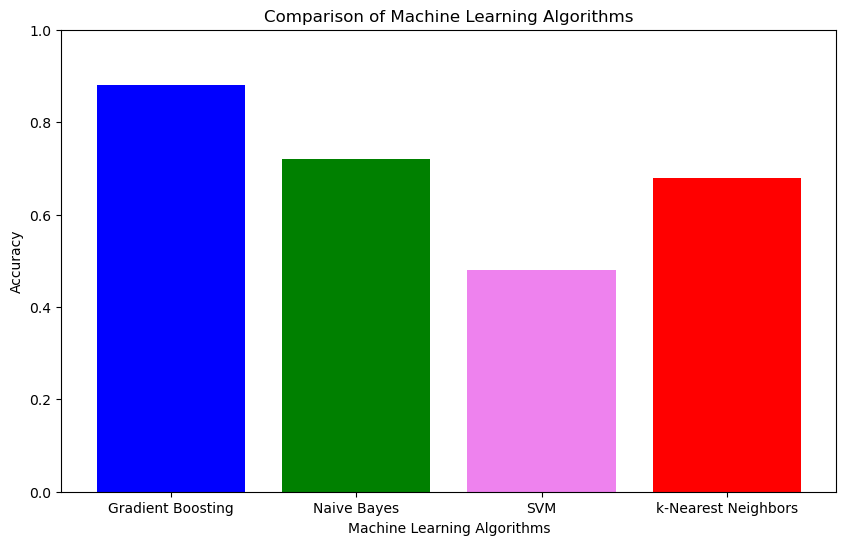

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to train and test the model and return accuracy
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize models
gbc_model = GradientBoostingClassifier()
nb_model = GaussianNB()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Train and evaluate models
models = [gbc_model, nb_model, svm_model, knn_model]
model_names = ['Gradient Boosting', 'Naive Bayes', 'SVM', 'k-Nearest Neighbors']

accuracies = []
for model in models:
    accuracies.append(evaluate_model(model, X_train, X_test, y_train, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'violet','red'])
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Algorithms')
plt.ylim(0, 1)
plt.show()

In [ ]:
#THUS, THE ACCURACY OF GB IS HIGHEST .WE WILL BE CHECKING FOR THE RANDOM INPUT VALUES

In [ ]:
pH = float(input("Input pH: "))
temp = float(input("Input the temperature: "))
taste = float(input("Input taste: "))
odor = float(input("Input odor: "))
fat = float(input("Input fat: "))
turb = float(input("Input turbidity: "))
color = float(input("Input colour: "))

Input pH: 6.6
Input the temperature: 35
Input taste: 1
Input odor: 0
Input fat: 1
Input turbidity: 0
Input colour: 254


In [ ]:
input_data = [pH, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])
if prediction[0] == 2:
    print("Milk is Pure")
elif prediction[0] == 1:
    print("Milk is Average")
else:
    print("Milk is Bad")

Milk is Pure


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


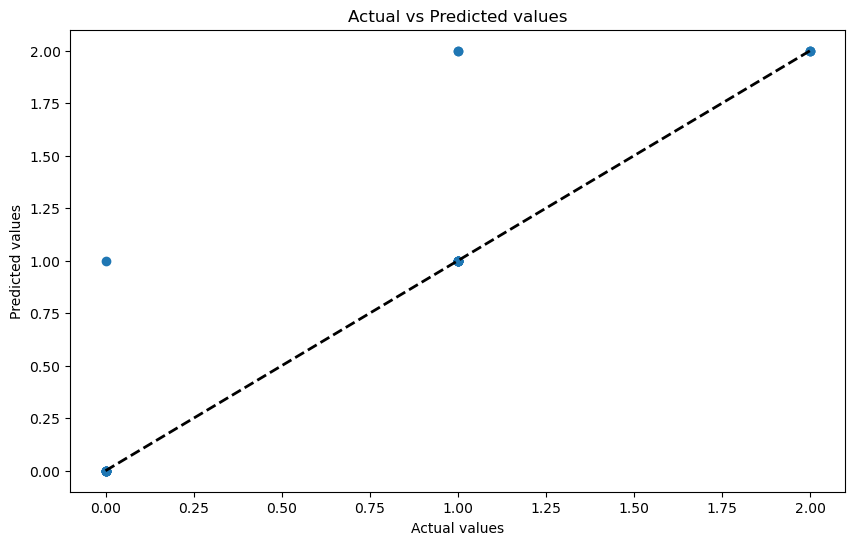

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # diagonal line
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")
plt.show()